In [254]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import quantstats as qs
import warnings
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
yf.pdr_override()
warnings.filterwarnings('ignore')

In [146]:
tickers = pd.read_excel('composicao_ibov.xlsx')
tickers


,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2023-01-31
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,RRRP3,RRRP3,RRRP3,RRRP3,RRRP3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,ALPA4,ALPA4,ALPA4,ALPA4,ALPA4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,AMER3,AMER3,AMER3,AMER3,AMER3
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,B3SA3,PETR3,PETR3,PETR3,BBDC4,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,VALE3,VALE3,VALE3,VALE3,WEGE3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,VIIA3,VIIA3,VIIA3,VIIA3,YDUQ3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,EZTC3,CASH3,POSI3,VBBR3,VBBR3,VBBR3,VBBR3,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,CASH3,POSI3,NaN,WEGE3,WEGE3,WEGE3,WEGE3,NaN


In [147]:
#pegando lista de tickers

intervalo_tempo = tickers.columns

lista_tickers = []

for mes in intervalo_tempo:

    tickers_no_ano = tickers[mes]

    tickers_no_ano = tickers_no_ano.dropna()

    tickers_no_ano = tickers_no_ano + ".SA"

    lista_tickers.append(tickers_no_ano)


lista_tickers_finais = pd.concat(lista_tickers)

lista_tickers_finais = lista_tickers_finais.drop_duplicates()

lista_tickers_finais = list(lista_tickers_finais)

lista_tickers_finais

['ABEV3.SA',
 'AMER3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'FIBR3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'OIBR3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'UGPA3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VALE5.SA',
 'VIVT3.SA',
 'YDUQ3.SA',
 'WEGE3.SA',
 'ELET6.SA',
 'TAEE11.SA',
 'FLRY3.SA',
 'MGLU3.SA',
 'SAPR11.SA',
 'VVAR11.SA',
 'JPSA3.SA',
 'CVCB3.SA',
 'VIIA3.SA',
 'LOGG3.SA',
 'VBBR3.SA',
 'IRBR3.SA',
 'AZUL4.SA',
 'HAPV3.SA',
 'BPAC1

In [148]:
#puxando dados de cotação ajustada

dados_cotacoes = pdr.get_data_yahoo(lista_tickers_finais, start="2015-06-30", end= datetime.now())['Adj Close']
dados_cotacoes

[*********************100%***********************]  107 of 107 completed

5 Failed downloads:
- BIDI4.SA: No data found for this date range, symbol may be delisted
- JPSA3.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No data found for this date range, symbol may be delisted
- LCAM3.SA: No data found for this date range, symbol may be delisted
- BIDI11.SA: No data found for this date range, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668835,5.577975,19.304613,19.890102,NaN,NaN,NaN,2.914592,16.064678,9.596826,...,29.088478,3.501015,11.896465,14.912728,NaN,6.839885,21.685261,11.133476,6.445273,13.737409
2015-07-01,14.776978,5.665764,18.623274,19.898390,NaN,NaN,NaN,2.894612,15.859566,9.535092,...,28.809889,3.475523,11.779386,14.759581,NaN,6.839885,21.480137,11.222941,6.604625,13.546082
2015-07-02,14.707456,5.631999,18.831461,20.088928,NaN,NaN,NaN,2.884622,15.813251,9.541011,...,29.154816,3.492518,11.753370,14.797868,NaN,6.839885,22.007612,11.073833,6.635141,13.622611
2015-07-03,14.792425,5.638752,18.594885,19.964664,NaN,NaN,NaN,2.857150,15.661077,9.568462,...,28.951395,3.424536,11.499701,NaN,NaN,7.655104,22.007612,NaN,6.723293,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964664,NaN,NaN,NaN,2.882124,15.780172,9.383133,...,29.185764,3.552001,11.480185,14.328854,NaN,7.655104,21.984171,10.934664,6.716511,13.431283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,14.190000,14.330000,9.030000,74.120003,18.990000,14.48,10.30,12.250000,33.259998,13.172750,...,11.950000,7.030000,89.400002,NaN,14.70,2.310000,36.389999,NaN,38.099998,9.790000
2023-01-03,14.170000,13.400000,8.520000,71.809998,18.610001,14.22,10.16,11.840000,32.639999,12.550000,...,11.760000,6.950000,89.239998,NaN,14.26,2.200000,35.660000,NaN,37.150002,9.170000
2023-01-04,14.250000,13.490000,8.730000,73.459999,19.080000,14.50,10.56,11.930000,33.060001,12.660000,...,12.040000,7.090000,89.400002,NaN,14.68,2.280000,36.439999,NaN,37.400002,9.290000


In [149]:
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)

In [150]:
#resample pra mensal

ultima_linha = dados_cotacoes.iloc[-1:]
dados_cotacoes_mensais = dados_cotacoes.resample("M").last()

dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668835,5.577975,19.304613,19.890102,NaN,NaN,NaN,2.914592,16.064678,9.596826,...,29.088478,3.501015,11.896465,14.912728,NaN,6.839885,21.685261,11.133476,6.445273,13.737409
2015-07-31,15.039611,5.267336,17.118650,17.744528,NaN,NaN,NaN,2.612393,14.589217,9.492961,...,31.078415,3.339561,11.623281,14.022558,NaN,7.655104,22.664038,8.598622,6.371392,10.890436
2015-08-31,14.746080,5.139030,14.762350,18.220682,NaN,NaN,NaN,2.729601,11.887419,8.643829,...,28.220442,2.532288,11.655803,13.543973,NaN,7.655104,20.284426,6.769550,5.703946,9.543482
2015-09-30,15.116618,4.578725,14.062085,16.571825,NaN,NaN,NaN,2.805564,10.301102,8.117268,...,29.701046,2.846699,10.784219,12.749521,NaN,2.704141,18.237368,3.936479,5.278553,10.790945
2015-10-31,14.859745,5.767763,13.797121,17.487852,NaN,NaN,NaN,2.886590,10.822932,8.061205,...,29.789968,2.362336,11.319363,13.762343,NaN,2.883091,19.972218,4.224757,4.919818,11.831773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,14.762184,21.270000,16.980000,97.418350,17.516525,13.55,14.720000,12.961282,37.941753,16.234819,...,11.730000,7.520000,71.795647,NaN,16.815786,3.190000,39.401550,NaN,32.093353,14.450000
2022-10-31,15.199160,21.959999,15.540000,103.446976,19.782196,14.92,16.129999,14.937753,36.464268,16.579744,...,13.410000,7.230000,66.902298,NaN,17.790615,3.130000,40.199505,NaN,40.221539,16.129999
2022-11-30,15.123164,16.750000,10.560000,88.667427,20.011757,13.83,12.280000,12.643456,34.919239,13.724341,...,14.200000,7.820000,85.419281,NaN,16.113911,2.180000,37.027138,NaN,38.943398,11.500000


In [151]:
#adicionando uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)

#excluindo uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.drop("2023-01-31", axis = 0)


dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668835,5.577975,19.304613,19.890102,NaN,NaN,NaN,2.914592,16.064678,9.596826,...,29.088478,3.501015,11.896465,14.912728,NaN,6.839885,21.685261,11.133476,6.445273,13.737409
2015-07-31,15.039611,5.267336,17.118650,17.744528,NaN,NaN,NaN,2.612393,14.589217,9.492961,...,31.078415,3.339561,11.623281,14.022558,NaN,7.655104,22.664038,8.598622,6.371392,10.890436
2015-08-31,14.746080,5.139030,14.762350,18.220682,NaN,NaN,NaN,2.729601,11.887419,8.643829,...,28.220442,2.532288,11.655803,13.543973,NaN,7.655104,20.284426,6.769550,5.703946,9.543482
2015-09-30,15.116618,4.578725,14.062085,16.571825,NaN,NaN,NaN,2.805564,10.301102,8.117268,...,29.701046,2.846699,10.784219,12.749521,NaN,2.704141,18.237368,3.936479,5.278553,10.790945
2015-10-31,14.859745,5.767763,13.797121,17.487852,NaN,NaN,NaN,2.886590,10.822932,8.061205,...,29.789968,2.362336,11.319363,13.762343,NaN,2.883091,19.972218,4.224757,4.919818,11.831773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,14.762184,21.270000,16.980000,97.418350,17.516525,13.55,14.720000,12.961282,37.941753,16.234819,...,11.730000,7.520000,71.795647,NaN,16.815786,3.190000,39.401550,NaN,32.093353,14.450000
2022-10-31,15.199160,21.959999,15.540000,103.446976,19.782196,14.92,16.129999,14.937753,36.464268,16.579744,...,13.410000,7.230000,66.902298,NaN,17.790615,3.130000,40.199505,NaN,40.221539,16.129999
2022-11-30,15.123164,16.750000,10.560000,88.667427,20.011757,13.83,12.280000,12.643456,34.919239,13.724341,...,14.200000,7.820000,85.419281,NaN,16.113911,2.180000,37.027138,NaN,38.943398,11.500000


In [152]:
#extraindo datas das carteiras

datas_carteiras = list(dados_cotacoes_mensais.index)[6:]
datas_carteiras


[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

In [153]:
#preenchendo NAs com zero para calcular retorno

dados_cotacoes_mensais = dados_cotacoes_mensais.fillna(0)

dados_cotacoes_mensais

lista_cotacoes = dados_cotacoes_mensais.columns
lista_cotacoes

Index(['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AURE3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA',
       ...
       'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VALE5.SA', 'VBBR3.SA', 'VIIA3.SA',
       'VIVT3.SA', 'VVAR11.SA', 'WEGE3.SA', 'YDUQ3.SA'],
      dtype='object', length=107)

In [154]:
def calculate_asset_momentum(df, regression='linear'):
      
  # reshape the series to use in the linear regression
  y = df.iloc[:].values.reshape(-1, 1)
  
  # take the log if exponential regression is wanted
  if regression == 'exp':
    y = np.log(y)
    
  # create a linear spaced vector corresponding to days
  x = np.arange(len(y)).reshape(-1, 1)
    
  # call the function to calculate the regression
  reg = LinearRegression().fit(x, y)

  # get the angular coeff (beta) and the R²
  beta = reg.coef_
  r2 = reg.score(x, y)

  # calculate anualised momentum: a year has approx 252 trading days
  if regression == 'exp':
    momentum = (np.exp(beta * 252) - 1) * r2  
  else:
    momentum = beta * 252 * r2
    
  return momentum

In [155]:
momentum = pd.DataFrame()
for i in lista_cotacoes:
    try:
        ticker = i
        months = 6

#       momentum[ticker + '_linear'] = dados_cotacoes_mensais[ticker].rolling(months).apply(calculate_asset_momentum)
        momentum[ticker] = dados_cotacoes_mensais[ticker].rolling(months).apply(calculate_asset_momentum, args=('exp',))
        
#       momentum.insert(momentum[ticker + '_linear'])
        
        momentum.insert(momentum[ticker])
    except:
        pass

In [156]:
momentum

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,52.972614,2.132937,-0.315588,8.125695e+02,-0.010577,10747.887712,1.694912,1.384412,120.474074,0.011908,...,-0.000011,-0.648677,-1.317266e-02,-0.157916,-0.909066,-5.297402e-01,3.142664,-0.976438,6.168372e+01,-0.399809
2022-10-31,1679.542471,0.703524,-0.023768,9.934878e+07,24686.955822,70.174226,4.990532,2.498958,255.686010,-0.000673,...,2.636973,-0.145304,4.754109e+04,-0.092742,-0.865582,-4.170742e-01,87051.833574,-0.844979,1.597020e+09,0.035297
2022-11-30,1969.468606,-0.105078,-0.068518,4.790442e+06,301309.119643,1.389068,0.192951,-0.000024,4753.573116,-0.024700,...,-0.057375,3.831457,4.676149e+06,63.770833,-0.657711,2.582249e+02,3226.187484,-0.852191,8.646143e+09,0.002968


In [157]:
lista_datas_momentum = momentum.index[5:]

In [158]:
lista_datas_momentum

DatetimeIndex(['2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
      

In [202]:
df_1 = pd.DataFrame()
for data in lista_datas_momentum:
    df_momentum = pd.DataFrame(momentum.loc[data])
    df_momentum = df_momentum.sort_values(by = data, ascending = False)
    df_1[data] = df_momentum.head(10).index

df_1 = df_1.T
df_1 = df_1[1:-1]
df_1.index = pd.to_datetime(df_1.index)
df_1

,0,1,2,3,4,5,6,7,8,9
2015-12-31,BRKM5.SA,SMTO3.SA,CSAN3.SA,EMBR3.SA,ELET6.SA,MRVE3.SA,HYPE3.SA,KLBN11.SA,SBSP3.SA,CSNA3.SA
2016-01-31,BRKM5.SA,MRVE3.SA,HYPE3.SA,SMTO3.SA,CSAN3.SA,SBSP3.SA,ELET6.SA,EMBR3.SA,BPAN4.SA,ELET3.SA
2016-02-29,MRVE3.SA,HYPE3.SA,MGLU3.SA,SBSP3.SA,BRKM5.SA,CSAN3.SA,BPAN4.SA,ALPA4.SA,SMTO3.SA,BRML3.SA
2016-03-31,MGLU3.SA,MRVE3.SA,HYPE3.SA,SBSP3.SA,CSNA3.SA,RADL3.SA,MULT3.SA,CSAN3.SA,PRIO3.SA,B3SA3.SA
2016-04-30,MGLU3.SA,CSNA3.SA,PRIO3.SA,B3SA3.SA,FLRY3.SA,GOAU4.SA,BRAP4.SA,MRVE3.SA,RADL3.SA,MULT3.SA
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,CIEL3.SA,PETR3.SA,PETR4.SA,ELET6.SA,ELET3.SA,BBAS3.SA,BEEF3.SA,BBSE3.SA,POSI3.SA,HYPE3.SA
2022-09-30,POSI3.SA,CIEL3.SA,PETR4.SA,PETR3.SA,EZTC3.SA,MRVE3.SA,HYPE3.SA,CYRE3.SA,BBAS3.SA,FLRY3.SA
2022-10-31,POSI3.SA,CIEL3.SA,MGLU3.SA,WEGE3.SA,CYRE3.SA,ARZZ3.SA,EZTC3.SA,BRPR3.SA,COGN3.SA,MRVE3.SA
2022-11-30,POSI3.SA,PRIO3.SA,MGLU3.SA,WEGE3.SA,BRPR3.SA,SBSP3.SA,GOAU4.SA,GGBR4.SA,CYRE3.SA,CIEL3.SA


In [203]:
lista_retornos = []
for i in df_1.index:
    print(i.year)
    data_1 = datetime(i.year, i.month, i.day)+relativedelta(days=+1)
    data_2 = data_1+relativedelta(months=+1)
    for j in range(0,10):
        cotacao = pdr.get_data_yahoo(df_1.loc[i][j], start=data_1, end=data_2)['Adj Close']
        retornos_em_porcentagem = ((cotacao[-1] - cotacao[0])/cotacao[0])
        lista_retornos.append(retornos_em_porcentagem)

2015
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2016
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************10

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2016
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2017
[*********************100%***********************]  1 of 1 completed
[*********************10

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2017
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2018
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2019
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2019
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************10

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2020
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2021
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***

[*********************100%***********************]  1 of 1 completed
2022
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2022
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************10

In [364]:
df_retornos_finais = pd.DataFrame()
tamanho = 0
for data in df_1.index:
    tamanho+=10
    my_list = []
    for i in range(tamanho-10,tamanho):
        my_list.append(lista_retornos[i])
        df_retornos = pd.DataFrame(my_list, columns = [data])
    df_retornos_finais[data] = df_retornos


In [396]:
lista_datas = []
lista_retornos_meses = []
for data in df_1.index:
    lista_datas.append(data)
    lista_retornos_meses.append(df_retornos_finais[data].mean())
df_retornos_meses = pd.DataFrame(lista_retornos_meses, columns = ['Retorno Mês'], index = lista_datas)

In [400]:
df_retornos_meses

,Retorno Mês
2015-12-31,0.021373
2016-01-31,0.035534
2016-02-29,0.065546
2016-03-31,0.123456
2016-04-30,-0.134035
...,...
2022-08-31,-0.066157
2022-09-30,-0.053436
2022-10-31,-0.185238
2022-11-30,0.003305


In [385]:
df_retornos_meses = df_retornos_meses[1:]

In [386]:
#pegando dados do ibov

ibovespa = pdr.get_data_yahoo('^BVSP', start="2015-12-30", end= "2022-12-31" )['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

In [387]:
df_retornos_meses['ibovespa'] = retornos_ibovespa.values

df_retornos_meses.style.format({
    'Retorno Mês': '{:,.2%}'.format,
    'ibovespa': '{:,.2%}'.format
})

,Retorno Mês,ibovespa
2016-01-31 00:00:00,3.55%,-6.79%
2016-02-29 00:00:00,6.55%,5.91%
2016-03-31 00:00:00,12.35%,16.97%
2016-04-30 00:00:00,-13.40%,7.70%
2016-05-31 00:00:00,11.47%,-10.09%
2016-06-30 00:00:00,21.97%,6.30%
2016-07-31 00:00:00,18.01%,11.22%
2016-08-31 00:00:00,-2.74%,1.03%
2016-09-30 00:00:00,14.31%,0.80%
2016-10-31 00:00:00,1.69%,11.24%


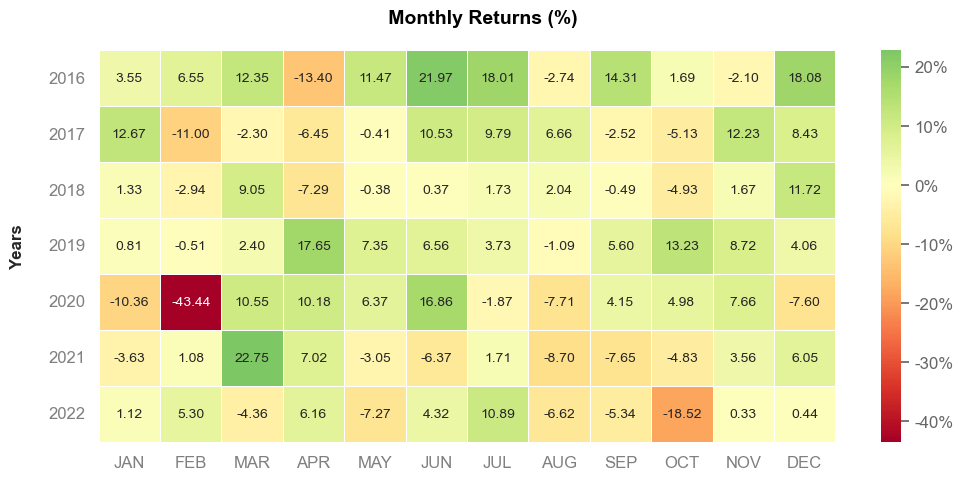

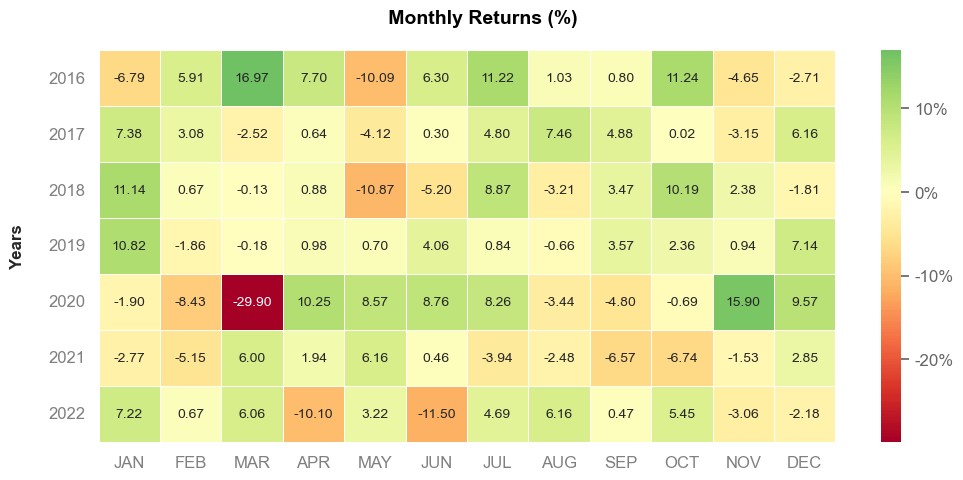

In [389]:
qs.extend_pandas()

df_retornos_meses['Retorno Mês'].plot_monthly_heatmap()

df_retornos_meses['ibovespa'].plot_monthly_heatmap()

#olha pra mim agora: se você chegar em alguma empresa do mercado financeiro, ou tem vontade de trabalhar como analista, existe alguma chance de você chegar 
#na entrevista de emprego com esse conhecimento em Python e você não passar? Você sabendo programar um modelo desse, com uma boa visualização de dados, você
#passa pra qualquer lugar.

In [391]:
#meses batendo o mercado 

retornos_modelo_bateu_mercado = df_retornos_meses.copy()

retornos_modelo_bateu_mercado['bateu_mercado'] = df_retornos_meses['Retorno Mês'] > df_retornos_meses['ibovespa']

print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_o_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_o_mercado)

            Retorno Mês  ibovespa  bateu_mercado
2016-01-31     0.035534 -0.067912           True
2016-02-29     0.065546  0.059100           True
2016-03-31     0.123456  0.169673          False
2016-04-30    -0.134035  0.077035          False
2016-05-31     0.114714 -0.100889           True
...                 ...       ...            ...
2022-08-31    -0.066157  0.061629          False
2022-09-30    -0.053436  0.004693          False
2022-10-31    -0.185238  0.054527          False
2022-11-30     0.003305 -0.030602           True
2022-12-31     0.004412 -0.021825           True

[84 rows x 3 columns]
0.5476190476190478


In [392]:
#retorno anual

retorno_anual = df_retornos_meses.copy()
retorno_anual['Retorno Mês'] = retorno_anual['Retorno Mês'] + 1 
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual["ano"] = retorno_anual.index.year

retorno_anual["retorno_acumulado_ano"] = retorno_anual.groupby('ano')['Retorno Mês'].cumprod() - 1
retorno_anual["retorno_acumulado_ibov"] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual.style.format({
    'retorno_acumulado_ano': '{:,.2%}'.format,
    'retorno_acumulado_ibov': '{:,.2%}'.format})


,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,2016,125.08%,38.93%
23,2017,32.94%,26.86%
35,2018,10.91%,15.03%
47,2019,91.84%,31.95%
59,2020,-24.39%,2.88%
71,2021,4.12%,-12.14%
83,2022,-15.84%,4.97%


In [395]:
cumulative_ret_modelo = (df_retornos_meses['Retorno Mês'] + 1).cumprod() - 1

cumulative_ret_ibov = (df_retornos_meses.ibovespa + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_modelo": cumulative_ret_modelo, "retorno_acum_ibov" : cumulative_ret_ibov }, index = cumulative_ret_ibov.index)

df_acumulado = df_acumulado.resample("Y").last()

df_acumulado = df_acumulado[['retorno_acum_modelo', 'retorno_acum_ibov']]

df_acumulado.style.format({
    'retorno_acum_modelo': '{:,.2%}'.format,
    'retorno_acum_ibov': '{:,.2%}'.format
})

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31 00:00:00,125.08%,38.93%
2017-12-31 00:00:00,199.22%,76.24%
2018-12-31 00:00:00,231.88%,102.74%
2019-12-31 00:00:00,536.67%,167.51%
2020-12-31 00:00:00,381.37%,175.22%
2021-12-31 00:00:00,401.20%,141.80%
2022-12-31 00:00:00,321.81%,153.82%
